## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.DataFrame.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
#why are these considered duplicates when tumor volume is different?
merged_df["duplicate"]=merged_df["Mouse ID"]=="g989"

merged_df.iloc[900:930, ]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicate
900,g570,Propriva,Male,16,29,30,60.328717,1,False
901,g570,Propriva,Male,16,29,35,62.330420,2,False
902,g570,Propriva,Male,16,29,40,68.525856,2,False
903,g570,Propriva,Male,16,29,45,70.492788,2,False
904,g867,Stelasyn,Female,9,25,0,45.000000,0,False
905,g867,Stelasyn,Female,9,25,5,46.880749,0,False
906,g867,Stelasyn,Female,9,25,10,48.183402,0,False
907,g867,Stelasyn,Female,9,25,15,51.060419,1,False
908,g989,Propriva,Female,21,26,0,45.000000,0,True
909,g989,Propriva,Female,21,26,0,45.000000,0,True


In [3]:
# Checking the number of mice.

# len(merged_df)
merged_df[merged_df["Mouse ID"]=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicate
908,g989,Propriva,Female,21,26,0,45.000000,0,True
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicate
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merged_df.drop_duplicates(['Mouse ID', 'Timepoint'])

In [6]:
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicate
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_df)

1888

In [8]:
# number of mice deleted
len(merged_df)-len(clean_df)

5

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_med = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_var = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_std = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_sem = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

tumor_stats = pd.DataFrame({"Mean of Tumor Volume": tumor_mean,
                              "Median of Tumor Volume": tumor_med,
                              "Variance of Tumor Volume": tumor_var,
                              "STD of Tumor Volume" :tumor_std, 
                              "SEM of Tumor Volume" :tumor_sem})
tumor_stats

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,STD of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
#agg method??
clean_df.agg({"Tumor Volume (mm3)" : ['mean', 'median', 'var', 'std', 'sem']})

,Tumor Volume (mm3)
mean,50.449276
median,48.951421
var,79.291277
std,8.904565
sem,0.204933


In [11]:
# Using the aggregation method, produce the same summary statistics in a single line
single_test=tumor_stats.T

single_test

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Mean of Tumor Volume,40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.393463,40.216745,54.233149,53.236507
Median of Tumor Volume,41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.909965,40.673236,52.431737,51.818479
Variance of Tumor Volume,24.947764,39.290177,43.128684,68.553577,66.173479,61.168083,43.138803,23.486704,59.450562,48.533355
STD of Tumor Volume,4.994774,6.268188,6.567243,8.279709,8.134708,7.821003,6.568014,4.846308,7.710419,6.966589
SEM of Tumor Volume,0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.525862,0.320955,0.573111,0.516398


In [12]:
#use this one!
single_line_test_2=clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)" : ['mean', 'median', 'var', 'std', 'sem']})
single_line_test_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

In [14]:
x=list(clean_df['Drug Regimen'].value_counts().sort_values())
x

[156, 178, 178, 181, 181, 182, 186, 188, 228, 230]

In [15]:
y=clean_df['Drug Regimen'].unique()
y

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [16]:
ax = clean_df[['Drug Regimen', 'Timepoint']]
ax

,Drug Regimen,Timepoint
0,Ramicane,0
1,Ramicane,5
2,Ramicane,10
3,Ramicane,15
4,Ramicane,20
...,...,...
1888,Naftisol,25
1889,Naftisol,30
1890,Naftisol,35
1891,Naftisol,40


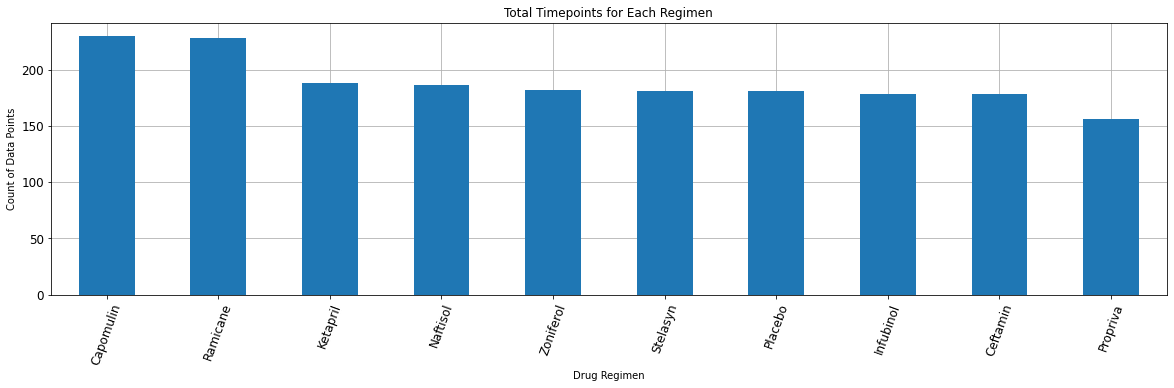

In [37]:
pandas_bar = clean_df['Drug Regimen'].value_counts().plot.bar(xlabel='Drug Regimen', ylabel="Count of Data Points", 
                                                      grid=True, zorder=3, rot=70, title='Total Timepoints for Each Regimen',
                                                             figsize=(20,5), fontsize=12)

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x=list(clean_df['Drug Regimen'].unique())
height=max(clean_df['Drug Regimen'].value_counts())
tick_labels=pd.Series(clean_df['Drug Regimen'].unique())
x
print(height)

230


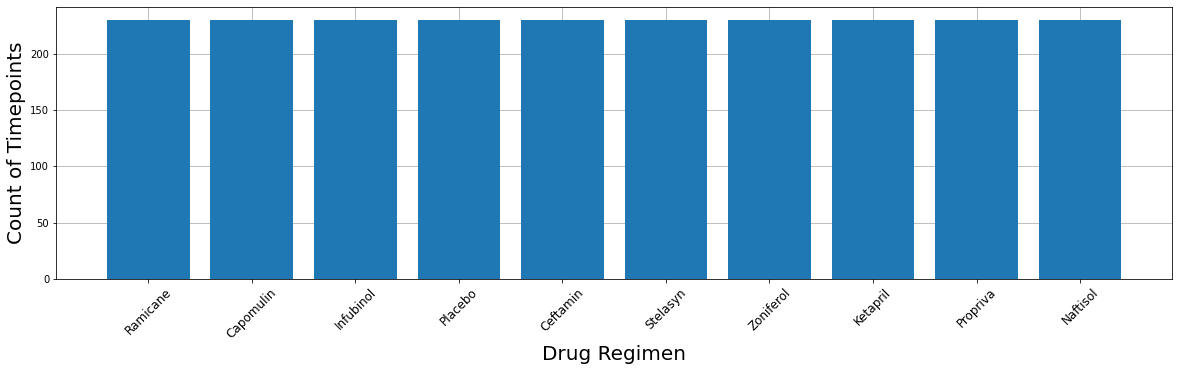

In [38]:
plt.figure(figsize=(20,5))
plt.bar(x,height, zorder=3)
plt.xlabel("Drug Regimen", fontsize=20)
plt.ylabel("Count of Timepoints", fontsize=20)
plt.xticks(rotation=45, fontsize=12)
plt.grid()

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [23]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
